<a href="https://colab.research.google.com/github/lsaghabi/pnad_for_study/blob/main/MVP_PNAD_UF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP - Minimum Viable Product

## **Disciplina: Machine Learning & Analytics**
## Aluna: Laura Orsatti Saghabi



Neste MVP, utilizei o **PNAD Contínua** como base de dados, exportado da plataforma Atlas do Desenvolvimento Humano no Brasil (http://www.atlasbrasil.org.br/acervo/biblioteca).

A série histórica de resultados acumulados da Pesquisa Nacional por Amostra de Domicílios Contínua - PNAD Contínua, no período de 2012 até a presente data, oferece uma rica fonte de informação com expressiva quantidade de indicadores.

Escolhi a opção de **treinar modelos de machine learning para um problema de classificação ou regressão**.

O modelo será treinado para prever a variável IDHM_CLASS (classes 0 e 1), utilizando variáveis relacionadas à escolaridade, esperança de vida, distribuição de renda (GINI), entre outros.
Essa classificação pode auxiliar gestores públicos na priorização de políticas públicas em regiões mais vulneráveis.



## Importando pacotes

In [1]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Importação de pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as ms # para tratamento de missings
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer

## Importando dataset

In [2]:
# GitHub raw URL ou Link Público do Drive
url = 'https://raw.githubusercontent.com/lsaghabi/pnad_for_study/main/pnad_tentativa_1.csv'

# csv de uma URL
pnad_br = pd.read_csv(url, encoding='latin-1') # utilização de parâmetro enconding='latin-1' para que o arquivo seja lido corretamente

In [3]:
# verificando que pnad_br é um dataframe
type(pnad_br)

pandas.core.frame.DataFrame

## Conhecendo o dataset
Simples análise exploratória do dataset para conhecê-lo um pouco melhor.

In [4]:
# dimensões do dataframe
pnad_br.shape

(490, 83)

O dataframe possui 490 linhas e 83 colunas.

In [5]:
# verificando o nome das colunas
pnad_br.columns

Index(['ANO', 'AGREGACAO', 'CODIGO', 'NOME', 'IDHM', 'IDHM_L', 'IDHM_E',
       'IDHM_R', 'I_ESCOLARIDADE', 'I_FREQ_PROP', 'IDHMAD', 'IDHMAD_L',
       'IDHMAD_E', 'IDHMAD_R', 'ATK_ESPVIDA', 'ATK_ANOSEST', 'ATK_RDPC',
       'IDHMAD_PERDA', 'IDHMAD_L_PERDA', 'IDHMAD_E_PERDA', 'IDHMAD_R_PERDA',
       'IDHMAD_COEF', 'ESPVIDA', 'MORT1', 'T_ENV', 'RAZDEP', 'T_FREQ5A6',
       'T_FUND11A13', 'T_FUND15A17', 'T_MED18A20', 'T_FUND18M', 'ANOSEST',
       'T_ANALF15M', 'T_ANALF18M', 'T_ANALF25M', 'T_FREQ6A14', 'T_FREQ15A17',
       'T_FREQ18A24', 'T_FUND18A24', 'T_FUND25M', 'T_MED25M', 'T_SUPER25M',
       'T_ATRASO_2_BASICO', 'T_ATRASO_2_FUND', 'T_FLBAS', 'T_FLFUND',
       'T_FLMED', 'T_FLSUPER', 'RDPC', 'RDPCT', 'RENOCUP', 'PRENTRAB', 'RDPC1',
       'RDPC2', 'RDPC3', 'RDPC4', 'RDPC5', 'RDPC10', 'R1040', 'R2040', 'GINI',
       'THEIL', 'PIND', 'PMPOB', 'PPOB', 'RIND', 'RMPOB', 'RPOB', 'POPTOT',
       'POP', 'POPT', 'POP5A6', 'POP6A14', 'POP6A17', 'POP11A13', 'POP15A17',
       'POP15M', 'P

Os nomes das colunas estão abreviadas. Segue a tabela explicativa dos atributos do dataframe para melhorar o entendimento dos dados.

In [6]:
# Convertendo para DataFrame
df_pnad_br = pd.DataFrame(pnad_br)

# Criando uma tabela explicativa das colunas
tabela_explicativa = pd.DataFrame({
    'Coluna': ['ANO', 'AGREGACAO', 'CODIGO', 'NOME', 'IDHM', 'IDHM_L', 'IDHM_E',
       'IDHM_R', 'I_ESCOLARIDADE', 'I_FREQ_PROP', 'IDHMAD', 'IDHMAD_L',
       'IDHMAD_E', 'IDHMAD_R', 'ATK_ESPVIDA', 'ATK_ANOSEST', 'ATK_RDPC',
       'IDHMAD_PERDA', 'IDHMAD_L_PERDA', 'IDHMAD_E_PERDA', 'IDHMAD_R_PERDA',
       'IDHMAD_COEF', 'ESPVIDA', 'MORT1', 'T_ENV', 'RAZDEP', 'T_FREQ5A6',
       'T_FUND11A13', 'T_FUND15A17', 'T_MED18A20', 'T_FUND18M', 'ANOSEST',
       'T_ANALF15M', 'T_ANALF18M', 'T_ANALF25M', 'T_FREQ6A14', 'T_FREQ15A17',
       'T_FREQ18A24', 'T_FUND18A24', 'T_FUND25M', 'T_MED25M', 'T_SUPER25M',
       'T_ATRASO_2_BASICO', 'T_ATRASO_2_FUND', 'T_FLBAS', 'T_FLFUND',
       'T_FLMED', 'T_FLSUPER', 'RDPC', 'RDPCT', 'RENOCUP', 'PRENTRAB', 'RDPC1',
       'RDPC2', 'RDPC3', 'RDPC4', 'RDPC5', 'RDPC10', 'R1040', 'R2040', 'GINI',
       'THEIL', 'PIND', 'PMPOB', 'PPOB', 'RIND', 'RMPOB', 'RPOB', 'POPTOT',
       'POP', 'POPT', 'POP5A6', 'POP6A14', 'POP6A17', 'POP11A13', 'POP15A17',
       'POP15M', 'POP18A20', 'POP18A24', 'POP18M', 'POP25M', 'POP65M',
       'POPOCUP18M'],
    'Descrição': [
        'Ano de referência dos dados.', 'Tipo de agregação dos dados (ex.: município, estado, região).',
        'Código identificador do local (ex.: código IBGE para municípios).', 'Nome do local (ex.: município ou estado).',
        'Índice de Desenvolvimento Humano Municipal (IDHM), geral.', 'Componente de longevidade do IDHM (expectativa de vida).',
        'Componente de educação do IDHM (escolaridade).', 'Componente de renda do IDHM (renda per capita).',
        'Índice de escolaridade da população.', 'Índice de frequência escolar proporcional (por faixa etária).',
        'Índice de Desenvolvimento Humano ajustado à desigualdade (IDHMAD), geral.', 'Componente de longevidade do IDHMAD.',
        'Componente de educação do IDHMAD.', 'Componente de renda do IDHMAD.', 'Expectativa de vida ao nascer.',
        'Anos esperados de estudo para crianças em idade escolar.', 'Renda domiciliar per capita ajustada.',
        'Perda percentual no IDHM devido à desigualdade.', 'Perda no componente longevidade do IDHMAD devido à desigualdade.',
        'Perda no componente educação do IDHMAD devido à desigualdade.', 'Perda no componente renda do IDHMAD devido à desigualdade.',
        'Coeficiente geral de desigualdade no IDHM ajustado.', 'Expectativa de vida ao nascer (anos).',
        'Taxa de mortalidade infantil (óbitos por mil nascidos vivos).', 'Taxa de envelhecimento da população.',
        'Razão de dependência (proporção de dependentes para população ativa).', 'Taxa de frequência escolar de crianças de 5 a 6 anos.',
        'Taxa de conclusão do ensino fundamental entre 11 e 13 anos.', 'Taxa de conclusão do ensino fundamental entre 15 e 17 anos.',
        'Taxa de conclusão do ensino médio entre 18 e 20 anos.', 'Taxa de alfabetização ou conclusão do fundamental para maiores de 18 anos.',
        'Média de anos de estudo da população adulta.', 'Taxa de analfabetismo para maiores de 15 anos.', 'Taxa de analfabetismo para maiores de 18 anos.',
        'Taxa de analfabetismo para maiores de 25 anos.', 'Taxa de frequência escolar de crianças de 6 a 14 anos.',
        'Taxa de frequência escolar de adolescentes de 15 a 17 anos.', 'Taxa de frequência escolar de jovens de 18 a 24 anos.',
        'Taxa de conclusão do ensino fundamental entre 18 e 24 anos.', 'Taxa de conclusão do ensino fundamental para maiores de 25 anos.',
        'Taxa de conclusão do ensino médio para maiores de 25 anos.', 'Taxa de conclusão do ensino superior para maiores de 25 anos.',
        'Taxa de atraso escolar no ensino básico.', 'Taxa de atraso escolar no ensino fundamental.', 'Taxa de conclusão do ensino básico.',
        'Taxa de conclusão do ensino fundamental.', 'Taxa de conclusão do ensino médio.', 'Taxa de conclusão do ensino superior.', 'Renda domiciliar per capita (média).',
        'Percentil da renda domiciliar per capita (exceto renda nula).', 'Rendimento dos ocupados.', 'Proporção de rendimentos vindos do trabalho.',
        'Renda per capta média do 1º quinto mais pobre.', 'Renda per capta média do 2º quinto mais pobre.', 'Renda per capta média do 3º quinto mais pobre.',
        'Renda per capta média do 4º quinto mais pobre.', 'Renda per capta média do quinto mais pobre.', 'Renda per capta média do décimo mais pobre.',
        'Razão 10% mais ricos pelos 40% mais pobres.', 'Razão 20% mais ricos pelos 40% mais pobres.', 'Índice de Gini (medida de desigualdade de renda).',
        'Índice de Theil (outra medida de desigualdade de renda).', 'Proporção de pessoas extremamente pobres.', 'Percentual de pobres.', 'Percentual de vulneráveis à pobreza.',
        'Renda per capita dos extremamente pobres.', 'Renda per capita dos pobres.', 'Renda per capita dos vulneráveis à pobreza.', 'População total.',
        'População total em domicílios particulares permanentes.', 'População total em domicílios particulares permanentes, exceto com renda nula.',
        'População de 5 a 6 anos de idade.', 'População de 6 a 17 anos de idade.', 'População de 11 a 13 anos de idade.', 'População de 15 a 17 anos de idade.',
        'População de 5 a 6 anos de idade.', 'População de 15 anos ou mais de idade.', 'População de 18 a 20 anos de idade.', 'População de 18 a 24 anos de idade.',
        'População de 18 anos ou mais de idade.', 'População de 25 anos ou mais de idade.', 'População de 65 anos ou mais de idade.', 'População ocupada de 18 anos ou mais de idade.'
    ]
    })

tabela_explicativa

,Coluna,Descrição
0,ANO,Ano de referência dos dados.
1,AGREGACAO,"Tipo de agregação dos dados (ex.: município, e..."
2,CODIGO,Código identificador do local (ex.: código IBG...
3,NOME,Nome do local (ex.: município ou estado).
4,IDHM,Índice de Desenvolvimento Humano Municipal (ID...
...,...,...
78,POP18A24,População de 18 a 24 anos de idade.
79,POP18M,População de 18 anos ou mais de idade.
80,POP25M,População de 25 anos ou mais de idade.
81,POP65M,População de 65 anos ou mais de idade.


In [7]:
pnad_br.dtypes

,0
ANO,int64
AGREGACAO,object
CODIGO,float64
NOME,object
IDHM,float64
...,...
POP18A24,object
POP18M,object
POP25M,object
POP65M,object


Observamos que há atributos de população com valores do tipo "object".

In [8]:
pnad_br.head(10)

,ANO,AGREGACAO,CODIGO,NOME,IDHM,IDHM_L,IDHM_E,IDHM_R,I_ESCOLARIDADE,I_FREQ_PROP,...,POP6A17,POP11A13,POP15A17,POP15M,POP18A20,POP18A24,POP18M,POP25M,POP65M,POPOCUP18M
0,2012,BRASIL,NaN,NaN,0.746,0.825,0.687,0.732,0.606,0.731,...,"39,808,859","10,304,212","10,609,288","150,994,845","10,076,087","23,924,348","140,385,557","116,461,209","15,249,133","84,277,753"
1,2013,BRASIL,NaN,NaN,0.753,0.830,0.698,0.737,0.615,0.744,...,"39,055,262","9,986,737","10,521,249","153,338,252","10,336,071","24,034,903","142,817,003","118,782,100","15,820,311","86,108,710"
2,2014,BRASIL,NaN,NaN,0.762,0.835,0.715,0.741,0.630,0.761,...,"38,765,780","9,687,655","10,446,675","155,356,978","10,224,771","23,840,076","144,910,303","121,070,227","16,425,141","87,308,460"
3,2015,BRASIL,NaN,NaN,0.765,0.840,0.724,0.736,0.642,0.769,...,"38,189,476","9,314,133","10,401,307","157,576,293","10,394,554","23,851,445","147,174,986","123,323,541","17,060,247","87,756,538"
4,2016,BRASIL,NaN,NaN,0.771,0.845,0.740,0.734,0.657,0.786,...,"37,694,949","9,288,033","10,375,148","159,692,542","10,242,815","23,779,687","149,317,393","125,537,706","17,728,449","87,110,394"
5,2017,BRASIL,NaN,NaN,0.774,0.849,0.742,0.735,0.655,0.789,...,"36,965,134","9,178,387","9,987,551","161,671,766","10,306,849","23,975,663","151,684,215","127,708,552","18,431,296","87,616,245"
6,2018,BRASIL,NaN,NaN,0.780,0.854,0.749,0.741,0.662,0.797,...,"36,460,225","9,041,166","9,641,591","163,492,349","10,093,878","23,998,725","153,850,757","129,852,032","19,168,661","89,281,706"
7,2019,BRASIL,NaN,NaN,0.785,0.858,0.760,0.743,0.674,0.807,...,"35,999,274","8,951,264","9,389,698","165,329,825","10,194,743","23,952,392","155,940,127","131,987,735","19,941,230","91,579,200"
8,2020,BRASIL,NaN,NaN,0.784,0.854,0.768,0.736,0.695,0.807,...,"35,750,038","8,751,715","9,357,153","167,005,197","9,806,225","23,521,448","157,648,044","134,126,596","20,748,553","83,946,549"
9,2021,BRASIL,NaN,NaN,0.766,0.819,0.757,0.724,0.703,0.785,...,"35,708,677","8,708,856","9,273,169","168,679,921","9,546,945","23,143,737","159,406,751","136,263,014","21,590,309","86,645,408"


Imprimindo as dez primeiras linhas, observamos valores nulos. Confirmamos contando as células conforme abaixo. As colunas CODIGO e NOME possuem valores nulos.

In [9]:
pnad_br.count()

,0
ANO,490
AGREGACAO,490
CODIGO,480
NOME,480
IDHM,490
...,...
POP18A24,490
POP18M,490
POP25M,490
POP65M,490


In [10]:
# Exibir as últimas linhas
pnad_br.tail()

,ANO,AGREGACAO,CODIGO,NOME,IDHM,IDHM_L,IDHM_E,IDHM_R,I_ESCOLARIDADE,I_FREQ_PROP,...,POP6A17,POP11A13,POP15A17,POP15M,POP18A20,POP18A24,POP18M,POP25M,POP65M,POPOCUP18M
485,2021,RM_RIDE,41.0,Região Metropolitana de Curitiba (PR),0.810,0.853,0.809,0.770,0.786,0.821,...,"597,131","145,026","144,363","2,944,851","168,688","396,866","2,800,487","2,403,621","349,457","1,752,556"
486,2021,RM_RIDE,42.0,Região Metropolitana de Florianópolis (SC),0.833,0.862,0.830,0.808,0.842,0.824,...,"163,119","37,589","41,956","854,671","30,232","75,671","812,715","737,043","108,152","517,071"
487,2021,RM_RIDE,43.0,Região Metropolitana de Porto Alegre (RS),0.788,0.834,0.749,0.783,0.784,0.732,...,"625,168","155,497","160,423","3,544,995","189,095","442,329","3,384,572","2,942,242","542,504","1,992,200"
488,2021,RM_RIDE,51.0,Região Metropolitana de Vale do Rio Cuiabá (MT),0.760,0.762,0.792,0.727,0.784,0.796,...,"163,300","42,388","41,980","735,333","38,041","94,673","693,352","598,679","74,800","419,973"
489,2021,RM_RIDE,52.0,Região Metropolitana de Goiânia (GO),0.764,0.758,0.800,0.735,0.751,0.825,...,"411,876","107,463","104,643","2,159,386","106,412","287,745","2,054,743","1,766,997","269,091","1,250,490"


## Pré-processamento

### Tratando missing

Neste dataframe, observamos que há diferentes agregações:


*   Brasil (geral)
*   UF (Estado)
*   Região Metropolitana

Não vamos utilizar as informações a nível Brasil, portanto, vamos excluir as linhas com as informações do Brasil.

Optei por fazer isso excluindo as linhas onde a coluna NOME possui valores nulos.



In [11]:
# Excluir linhas onde a coluna 'NOME' tem valores nulos
pnad_br = pnad_br[pnad_br['NOME'].notnull()]

pnad_br.head()

,ANO,AGREGACAO,CODIGO,NOME,IDHM,IDHM_L,IDHM_E,IDHM_R,I_ESCOLARIDADE,I_FREQ_PROP,...,POP6A17,POP11A13,POP15A17,POP15M,POP18A20,POP18A24,POP18M,POP25M,POP65M,POPOCUP18M
10,2012,UF,11.0,Rondônia,0.694,0.758,0.637,0.692,0.573,0.672,...,"376,608","97,777","98,337","1,178,946","95,589","214,469","1,080,609","866,139","76,506","671,531"
11,2012,UF,12.0,Acre,0.701,0.791,0.649,0.670,0.590,0.681,...,"213,475","56,740","53,660","520,588","45,038","102,639","466,927","364,288","33,783","268,210"
12,2012,UF,13.0,Amazonas,0.691,0.764,0.632,0.683,0.613,0.642,...,"950,932","236,394","232,546","2,410,643","205,482","465,298","2,178,096","1,712,798","169,573","1,253,397"
13,2012,UF,14.0,Roraima,0.738,0.752,0.746,0.717,0.719,0.760,...,"110,266","28,917","27,376","288,156","27,356","58,906","260,779","201,872","15,164","167,191"
14,2012,UF,15.0,Pará,0.666,0.771,0.583,0.658,0.537,0.608,...,"1,977,069","509,583","487,479","5,485,957","474,872","1,064,310","4,998,478","3,934,167","394,057","2,959,605"


### Limpando e convertendo tipos

Observamos que as colunas de população estão formatadas com separadores de milhares (vírgula) e com espaços em branco antes e depois dos valores, além de serem do tipo object.

Vamos limpar os dados e, em seguida, converter para número.

In [12]:
# Limpando espaços e convertendo para números inteiros
colunas_populacao = ['POPTOT',
       'POP', 'POPT', 'POP5A6', 'POP6A14', 'POP6A17', 'POP11A13', 'POP15A17',
       'POP15M', 'POP18A20', 'POP18A24', 'POP18M', 'POP25M', 'POP65M',
       'POPOCUP18M']  # Lista de colunas a serem convertidas

for coluna in colunas_populacao:
    pnad_br[coluna] = pnad_br[coluna].astype(str).str.strip()           # Removendo espaços no início e fim
    pnad_br[coluna] = pnad_br[coluna].astype(str).str.replace(',', '')  # Removendo separadores de milhares
    pnad_br[coluna] = pd.to_numeric(pnad_br[coluna])                    # Convertendo para numérico
    pnad_br[coluna] = pnad_br[coluna].astype(int)                       # Convertendo para inteiro

# Verificando o resultado
pnad_br.head()

,ANO,AGREGACAO,CODIGO,NOME,IDHM,IDHM_L,IDHM_E,IDHM_R,I_ESCOLARIDADE,I_FREQ_PROP,...,POP6A17,POP11A13,POP15A17,POP15M,POP18A20,POP18A24,POP18M,POP25M,POP65M,POPOCUP18M
10,2012,UF,11.0,Rondônia,0.694,0.758,0.637,0.692,0.573,0.672,...,376608,97777,98337,1178946,95589,214469,1080609,866139,76506,671531
11,2012,UF,12.0,Acre,0.701,0.791,0.649,0.670,0.590,0.681,...,213475,56740,53660,520588,45038,102639,466927,364288,33783,268210
12,2012,UF,13.0,Amazonas,0.691,0.764,0.632,0.683,0.613,0.642,...,950932,236394,232546,2410643,205482,465298,2178096,1712798,169573,1253397
13,2012,UF,14.0,Roraima,0.738,0.752,0.746,0.717,0.719,0.760,...,110266,28917,27376,288156,27356,58906,260779,201872,15164,167191
14,2012,UF,15.0,Pará,0.666,0.771,0.583,0.658,0.537,0.608,...,1977069,509583,487479,5485957,474872,1064310,4998478,3934167,394057,2959605


A coluna CODIGO está em float, mas tratam-se de números inteiros. Faremos a conversão dele também.

In [13]:
pnad_br['CODIGO'] = pnad_br['CODIGO'].astype(int)  # Convertendo para inteiro

In [14]:
pnad_br.dtypes

,0
ANO,int64
AGREGACAO,object
CODIGO,int64
NOME,object
IDHM,float64
...,...
POP18A24,int64
POP18M,int64
POP25M,int64
POP65M,int64


Confirmamos, acima, a limpeza e conversão.

### Inclusão de Estados e Regiões

Para uma melhor análise, incluiremos, a seguir, os Estados brasileiros em sigla, e suas respectivas regiões do país.

In [15]:
# Dicionário que mapeia os estados através do código
estado = {12: 'AC', 27: 'AL', 16: 'AP', 13: 'AM', 29: 'BA',
          23: 'CE', 53: 'DF', 32: 'ES', 52: 'GO',
          21: 'MA', 51: 'MT', 50: 'MS', 31: 'MG',
          15: 'PA', 25: 'PB', 41: 'PR', 26: 'PE', 22: 'PI',
          33: 'RJ', 24: 'RN', 43: 'RS', 11: 'RO', 14: 'RR',
          42: 'SC', 35: 'SP', 28: 'SE', 17: 'TO'}

# Dicionário que mapeia os estados para cada região
estado_regiao = {
    12: 'Norte', 27: 'Nordeste', 16: 'Norte', 13: 'Norte', 29: 'Nordeste',
    23: 'Nordeste', 53: 'Centro-Oeste', 32: 'Sudeste', 52: 'Centro-Oeste',
    21: 'Nordeste', 51: 'Centro-Oeste', 50: 'Centro-Oeste', 31: 'Sudeste',
    15: 'Norte', 25: 'Nordeste', 41: 'Sul', 26: 'Nordeste', 22: 'Nordeste',
    33: 'Sudeste', 24: 'Nordeste', 43: 'Sul', 11: 'Norte', 14: 'Norte',
    42: 'Sul', 35: 'Sudeste', 28: 'Nordeste', 17: 'Norte'}

# Criando uma novas colunas 'Região' e 'Estado' através dos mapeamentos acima
pnad_br['REGIAO'] = pnad_br['CODIGO'].map(estado_regiao)
pnad_br['ESTADO'] = pnad_br['CODIGO'].map(estado)

### Inclusão da classificação do IDHM

Para auxiliar na construção do nosso modelo, criaremos a seguir a coluna "IDHM_CLASS' que reporta uma classe binária para o IDHM onde,
IDHM > 7.0 é Alto e,
IDHM < 7.0 é baixo

e Alto = 1
Baixo = 0

In [16]:
# Adicionando variável de classe binária para IDHM
pnad_br['IDHM_CLASS'] = np.where(pnad_br['IDHM'] > 0.7, 1, 0)  # 1 = alto, 0 = baixo

In [17]:
# Confirmando que o código acima atribuiu valor para todas as células
pnad_br.count()

,0
ANO,480
AGREGACAO,480
CODIGO,480
NOME,480
IDHM,480
...,...
POP65M,480
POPOCUP18M,480
REGIAO,480
ESTADO,480


## Dataframe pnad_br_uf
Criação do dtaframe pnad_br_uf com os atributos que serão utilizadas no modelo Machine Learnig.

In [18]:
# selecionando as colunas que vamos utilizar (feature selection)
colunas_desejadas = ['ANO', 'AGREGACAO', 'ESTADO', 'REGIAO', 'IDHM', 'IDHM_CLASS', 'I_ESCOLARIDADE', 'ESPVIDA', 'POPTOT', 'GINI', 'PIND']
pnad_br_uf = pnad_br[colunas_desejadas]

In [19]:
# selecionando apenas as linhas onde a agregação é por UF (excluindo as Regiões Metropolitanas)
pnad_br_uf = pnad_br_uf[pnad_br_uf['AGREGACAO'] == 'UF']

In [20]:
pnad_br_uf.head(27)

,ANO,AGREGACAO,ESTADO,REGIAO,IDHM,IDHM_CLASS,I_ESCOLARIDADE,ESPVIDA,POPTOT,GINI,PIND
10,2012,UF,RO,Norte,0.694,0,0.573,70.50,1628074,0.487,4.12
11,2012,UF,AC,Norte,0.701,1,0.590,72.47,777461,0.566,10.04
12,2012,UF,AM,Norte,0.691,0,0.613,70.85,3540643,0.589,7.89
13,2012,UF,RR,Norte,0.738,1,0.719,70.10,426804,0.549,4.80
14,2012,UF,PA,Norte,0.666,0,0.537,71.23,7920522,0.533,7.69
15,2012,UF,AP,Norte,0.707,1,0.670,72.77,721361,0.528,3.42
16,2012,UF,TO,Norte,0.710,1,0.581,72.11,1437474,0.507,4.21
17,2012,UF,MA,Nordeste,0.648,0,0.508,69.34,6765940,0.498,13.58
18,2012,UF,PI,Nordeste,0.660,0,0.475,70.19,3212635,0.495,8.94
19,2012,UF,CE,Nordeste,0.701,1,0.540,72.78,8734806,0.545,9.72


In [21]:
# Confirmando a estrutura do dataframe
pnad_br_uf.shape

(270, 11)

In [22]:
print(pnad_br_uf.head(20).to_dict())

{'ANO': {10: 2012, 11: 2012, 12: 2012, 13: 2012, 14: 2012, 15: 2012, 16: 2012, 17: 2012, 18: 2012, 19: 2012, 20: 2012, 21: 2012, 22: 2012, 23: 2012, 24: 2012, 25: 2012, 26: 2012, 27: 2012, 28: 2012, 29: 2012}, 'AGREGACAO': {10: 'UF', 11: 'UF', 12: 'UF', 13: 'UF', 14: 'UF', 15: 'UF', 16: 'UF', 17: 'UF', 18: 'UF', 19: 'UF', 20: 'UF', 21: 'UF', 22: 'UF', 23: 'UF', 24: 'UF', 25: 'UF', 26: 'UF', 27: 'UF', 28: 'UF', 29: 'UF'}, 'ESTADO': {10: 'RO', 11: 'AC', 12: 'AM', 13: 'RR', 14: 'PA', 15: 'AP', 16: 'TO', 17: 'MA', 18: 'PI', 19: 'CE', 20: 'RN', 21: 'PB', 22: 'PE', 23: 'AL', 24: 'SE', 25: 'BA', 26: 'MG', 27: 'ES', 28: 'RJ', 29: 'SP'}, 'REGIAO': {10: 'Norte', 11: 'Norte', 12: 'Norte', 13: 'Norte', 14: 'Norte', 15: 'Norte', 16: 'Norte', 17: 'Nordeste', 18: 'Nordeste', 19: 'Nordeste', 20: 'Nordeste', 21: 'Nordeste', 22: 'Nordeste', 23: 'Nordeste', 24: 'Nordeste', 25: 'Nordeste', 26: 'Sudeste', 27: 'Sudeste', 28: 'Sudeste', 29: 'Sudeste'}, 'IDHM': {10: 0.694, 11: 0.701, 12: 0.691, 13: 0.738, 14:

## Treinando o Modelo

Utilizaremos para **X** as variáveis Região, Índice de Escolaridade, Expectativa de Vida, População total, Índice de Gini e a Proporção de pessoas extremamente pobres.
Para **Y**, a variável alvo, utilizaresmos o IDHM_CLASS, que é a classificação do IDHM que criamos. Lembrando: IDHM_CLASS = 0 = IDHM Baixo (> 7.0); IDHM_CLASS = 1 = IDHM Alto (< 7.0).

In [23]:
# Selecionar colunas
X = pnad_br_uf[['REGIAO', 'I_ESCOLARIDADE', 'ESPVIDA', 'POPTOT', 'GINI', 'PIND']]
y = pnad_br_uf['IDHM_CLASS']

# Codifica a coluna 'REGIAO' usando One-Hot Encoding
X = pd.get_dummies(pnad_br_uf[['REGIAO', 'I_ESCOLARIDADE', 'ESPVIDA', 'POPTOT', 'GINI', 'PIND']], drop_first=True)

# Atribuir a semente para garantir consistência
SEED = 20

# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = SEED)

print("Treinaremos com %d elementos e testaremos com %d elementos." % (len(X_train), len(X_test)))

Treinaremos com 189 elementos e testaremos com 81 elementos.


O print confirma que a divisão de treino e teste foi feita conforme solicitado (30% teste e 70% treino).

### Random Forest

Abaixo, treinaremos um **modelo de Random Forest**.
*   Baseado em árvores de decisão
*   n_estimators = 100: serão 100 árvores
*   classification_report vai mostrar métricas como recall, f1-score e suporte
*   confusion_matrix vai mostrar a quantidade de acertos e erros



In [24]:
# Criando o modelo Random Forest
rf_model = RandomForestClassifier(random_state=SEED, n_estimators=100)

# Treinando o modelo com os dados de treino
rf_model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred_rf = rf_model.predict(X_test)

# Avaliando o desempenho
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_rf))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_rf))

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      0.69      0.81        16
           1       0.93      1.00      0.96        65

    accuracy                           0.94        81
   macro avg       0.96      0.84      0.89        81
weighted avg       0.94      0.94      0.93        81

Matriz de Confusão:
 [[11  5]
 [ 0 65]]


Avaliação do Modelo
*   Para a classe "0", ou seja, IDHM baixo, o modelo previu corretamente 11 vezes de 16 no total. Portanto, a precisão foi de 69%. Enquanto que pra classe "1", o modelo previu todos os testes corretamente (100% de recall).
*   A acurácia do modelo foi de 94%. É uma boa acurária no geral.
*   Para a classe "1", o modelo apresentou ótimo desempenho, porém, para a classe "0" mostrou alguns erros (5 erros, conforme a matriz de confusão).



#### Grid Search

Pensando em melhorar o desempenho da classe "0", vamos utilizar a biblioteca Grid Search para executar a otimização dos hiperparâmetros.


In [25]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=SEED), param_grid, cv=3)
grid_search.fit(X_train, y_train)
print("Melhores Parâmetros:", grid_search.best_params_)

Melhores Parâmetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


Interpretação dos "Melhores Parâmetros":
* max_depth': None: sem limite de profundidade;
* min_samples_leaf : 1: cada folha terá uma amostra
* min_samples_split : 2: mínimo de 2 amostras para dividir um "nó"
* n_estimators : 50: modelo vai usar 50 árvores



In [26]:
# Treinando com os melhores parâmetros
best_rf_model = RandomForestClassifier(
    random_state=SEED,
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=50
)
best_rf_model.fit(X_train, y_train)
y_pred_rf_best = best_rf_model.predict(X_test)

# Avaliar o modelo
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_rf_best))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_rf_best))

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      0.69      0.81        16
           1       0.93      1.00      0.96        65

    accuracy                           0.94        81
   macro avg       0.96      0.84      0.89        81
weighted avg       0.94      0.94      0.93        81

Matriz de Confusão:
 [[11  5]
 [ 0 65]]


Não houve diferença no resultado, levando a acreditar que os parâmetros inciais padrão estavam próximos dos ótimos ou o conjunto de dados pode ser muito pequeno.

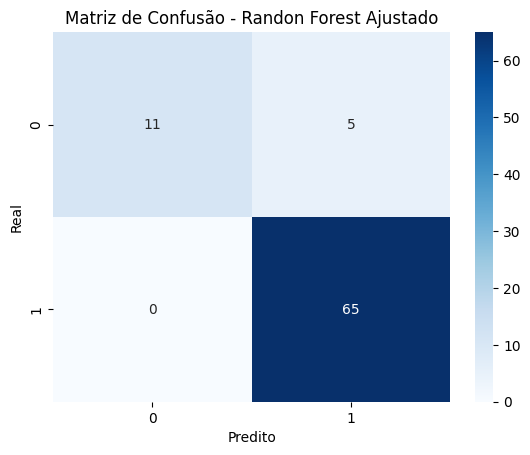

In [27]:
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf_best)

sns.heatmap(confusion_matrix_rf, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão - Randon Forest Ajustado")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()

**Importância das Variáveis**: A seguir, veremos as variáveis que mais influenciaram as previsões do modelo.

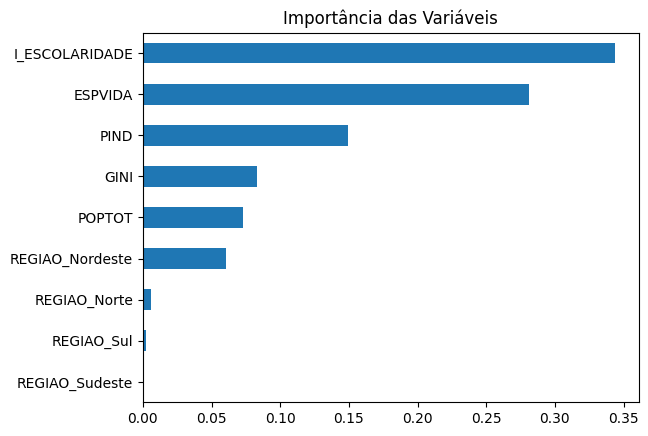

In [28]:
feature_importances = pd.Series(best_rf_model.feature_importances_, index=X.columns)
feature_importances.sort_values().plot(kind='barh', title="Importância das Variáveis")
plt.show()

In [29]:
# Realizando a validação cruzada
cv_scores = cross_val_score(
    best_rf_model,  # Modelo com os melhores parâmetros
    X,              # Dados de entrada
    y,              # Classes alvo
    cv=5,           # Número de folds
    scoring='accuracy'  # Métrica de avaliação
)

# Resultados
print("Acurácia por fold:", cv_scores)
print("Acurácia média:", cv_scores.mean())
print("Desvio padrão:", cv_scores.std())

Acurácia por fold: [0.90740741 0.98148148 0.96296296 0.94444444 0.85185185]
Acurácia média: 0.9296296296296296
Desvio padrão: 0.045961754244410576


### Modelo SVM

Vamos testar o modelo SVM para compararmos com Random Forest.

In [30]:
# Criar pipeline para escalonamento e modelo
svm_model = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(random_state=SEED))
])

# Treinar o modelo
svm_model.fit(X_train, y_train)

# Fazer previsões
y_pred_svm = svm_model.predict(X_test)

# Avaliar o modelo SVM
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_svm))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_svm))

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      0.62      0.77        16
           1       0.92      1.00      0.96        65

    accuracy                           0.93        81
   macro avg       0.96      0.81      0.86        81
weighted avg       0.93      0.93      0.92        81

Matriz de Confusão:
 [[10  6]
 [ 0 65]]


Os resultados são diferentes do que encontramos no Random Forest.
* De 16 exemplos da classe "0", 10 foram classificados de forma correta e 6 foram classificados erroneamente. Já para a classe "1", os 65 exemplos foram classificados corretamente.
* A precisão da classe "0" foi de 62% (no modelo Randon Forest foi de 69%).
* O equilíbro entre precisão e recall foi menor, 77%.
* A acurácia foi boa (93%), porém menor que o modelo Radom Forest.

#### Grid Search

Otimizando hiperprâmetros.

In [31]:
# Parâmetros para ajustar
param_grid_svm = {
    'svm__C': [0.1, 1, 10, 100],
    'svm__gamma': [1, 0.1, 0.01, 0.001],
    'svm__kernel': ['linear', 'rbf']
}

# Ajustar os parâmetros
grid = GridSearchCV(svm_model, param_grid_svm, cv=3)
grid.fit(X_train, y_train)

# Exibir os melhores parâmetros
best_svm_model = grid.best_estimator_
print("Melhores Parâmetros:", grid.best_params_)

# Avaliar o modelo ajustado
y_pred_best_svm = best_svm_model.predict(X_test)
print("Relatório de Classificação com SVM Ajustado:\n", classification_report(y_test, y_pred_best_svm))
print("Matriz de Confusão com SVM Ajustado:\n", confusion_matrix(y_test, y_pred_best_svm))

Melhores Parâmetros: {'svm__C': 10, 'svm__gamma': 1, 'svm__kernel': 'linear'}
Relatório de Classificação com SVM Ajustado:
               precision    recall  f1-score   support

           0       1.00      0.69      0.81        16
           1       0.93      1.00      0.96        65

    accuracy                           0.94        81
   macro avg       0.96      0.84      0.89        81
weighted avg       0.94      0.94      0.93        81

Matriz de Confusão com SVM Ajustado:
 [[11  5]
 [ 0 65]]


Após o ajuste dos hiperparâmetros, o modelo obteve o mesmo resultado do modelo Random Forest inicial.

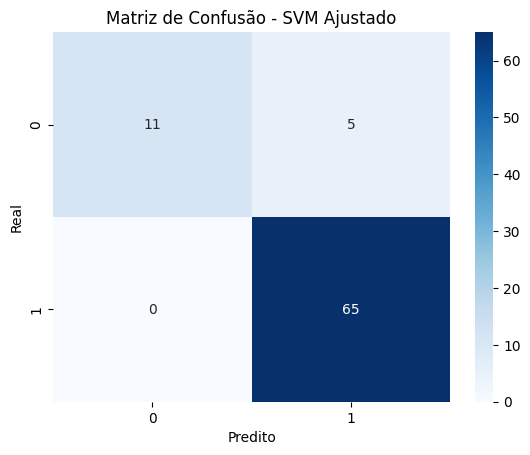

In [32]:
confusion_matrix_svm = confusion_matrix(y_test, y_pred_best_svm)

sns.heatmap(confusion_matrix_svm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão - SVM Ajustado")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()

In [33]:
# Validação cruzada com o SVM ajustado
scores = cross_val_score(best_svm_model, X, y, cv=5, scoring='accuracy')
print(f"Acurácia por fold: {cv_scores}")
print(f"Acurácia média da validação cruzada: {cv_scores.mean()}")
print(f"Desvio padrão: {cv_scores.std()}")

Acurácia por fold: [0.90740741 0.98148148 0.96296296 0.94444444 0.85185185]
Acurácia média da validação cruzada: 0.9296296296296296
Desvio padrão: 0.045961754244410576


### Validação Cruzada

O resultado da validação cruzada dos dois modelos foi igual:
- o modelo apresenta boa generalização (folds acima de 0,851);
- o modelo apresenta boa precisão (acurácia média de 93%);
- desvio padrão relativamente baixo - 0,046 - próximo de 0.


### Conclusão

O **problema** abordado neste trabalho consiste em **classificar** os estados brasileiros em dois grupos (desenvolvidos e menos desenvolvidos) com base em indicadores socioeconômicos da PNAD Contínua.

O modelo pode ser utilizado para:
- ajudar na identificação de estados que estão fora dos padrões esperados para o seu contexto socioeconômico;
- planejar políticas públicas através de uma base qauntitativa para definir prioridades em saúde, educação ou programas sociais;
- realizar análise preditiva para projeções futuras através da reaplicação do modelo com novos dados para prever o impacto de políticas públicas implementadas.

Os dois modelos apresentaram uma acurácia global de 93%, com métricas individuais favoráveis para ambas as classes, conforme o Relatório de Classificação.
A validação cruzada confirma a robustez do modelo, com um desvio padrão baixo, indicando consistência nas previsões em diferentes subconjuntos dos dados.

Há algumas limitações:
- desbalanceamento ou viés em favor da classe majoritária (1), indicado pelo recall de 100% na classe 1 e apenas 69% na classe 0;
- há certa generalização no modelo que pode ser comprometido quando há uma mudança significativa dos dados;
- peso muito maior da variável de escolaridade;

Para um futuro trabalho com melhorias:
- balancear melhor as variáveis
- adicionar novas variáveis
- testar em novos dados
- melhorar o balanceamento das classes
- experimentar outros modelos








